In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv("data/heart_attack_prediction_dataset.csv")
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [4]:
print(f"Total number of duplicate rows: {df.duplicated().sum()}")
print(f"Total Missing Values          : {df.isnull().sum().sum()}")

Total number of duplicate rows: 0
Total Missing Values          : 0


In [5]:
df[["Blood_Sistolik_Pressure", "Blood_Diyastolik_Pressure"]] = df["Blood Pressure"].str.split("/", expand=True).astype(int)
df.drop("Blood Pressure", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [6]:
column_list = df.columns
print(column_list)

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk', 'Blood_Sistolik_Pressure',
       'Blood_Diyastolik_Pressure'],
      dtype='object')


<Figure size 800x4000 with 0 Axes>

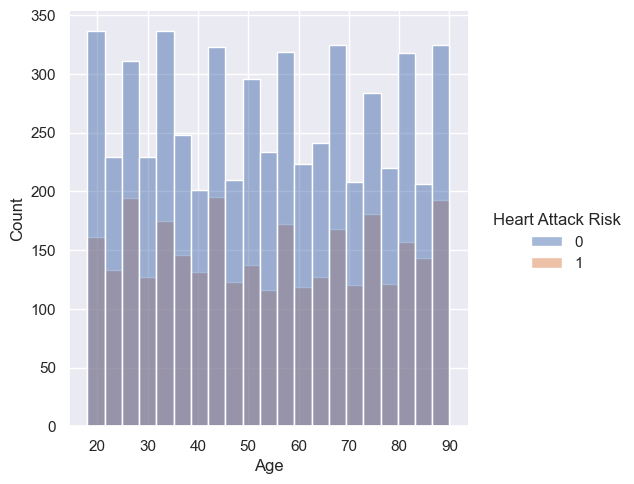

In [7]:
plt.figure(figsize=(8, 40))
sns.displot(x="Age", data=df, hue="Heart Attack Risk")

In [8]:
heart_attack_corr = df.corr()["Heart Attack Risk"]
heart_attack_corr = heart_attack_corr.drop("Heart Attack Risk", axis=0).sort_values(ascending=False)

/var/folders/t7/jzpwthyj49b5gry3gmcxqwxw0000gn/T/ipykernel_21884/3708292192.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heart_attack_corr = df.corr()["Heart Attack Risk"]


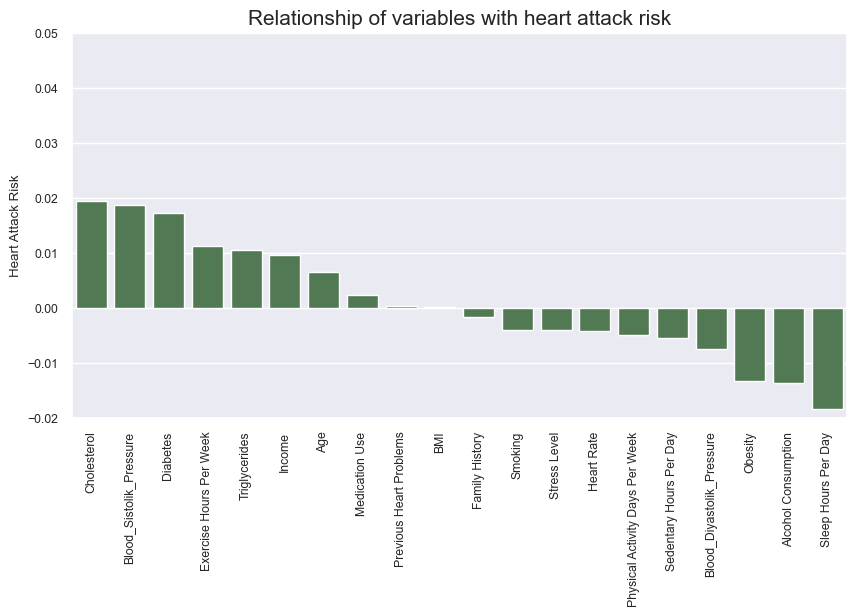

In [9]:
plt.figure(figsize=(10,5))
sns.set(font_scale=0.8)
sns.barplot(x=heart_attack_corr.index, y=heart_attack_corr, color="#4a804d")
plt.xticks(rotation=90)
plt.ylim(-0.02, 0.05)
plt.title("Relationship of variables with heart attack risk", fontsize=15)
plt.show()

/var/folders/t7/jzpwthyj49b5gry3gmcxqwxw0000gn/T/ipykernel_21884/2282542254.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=0.4, fmt='.3f', cmap="Oranges", annot_kws={'size': 8, 'rotation': 45})


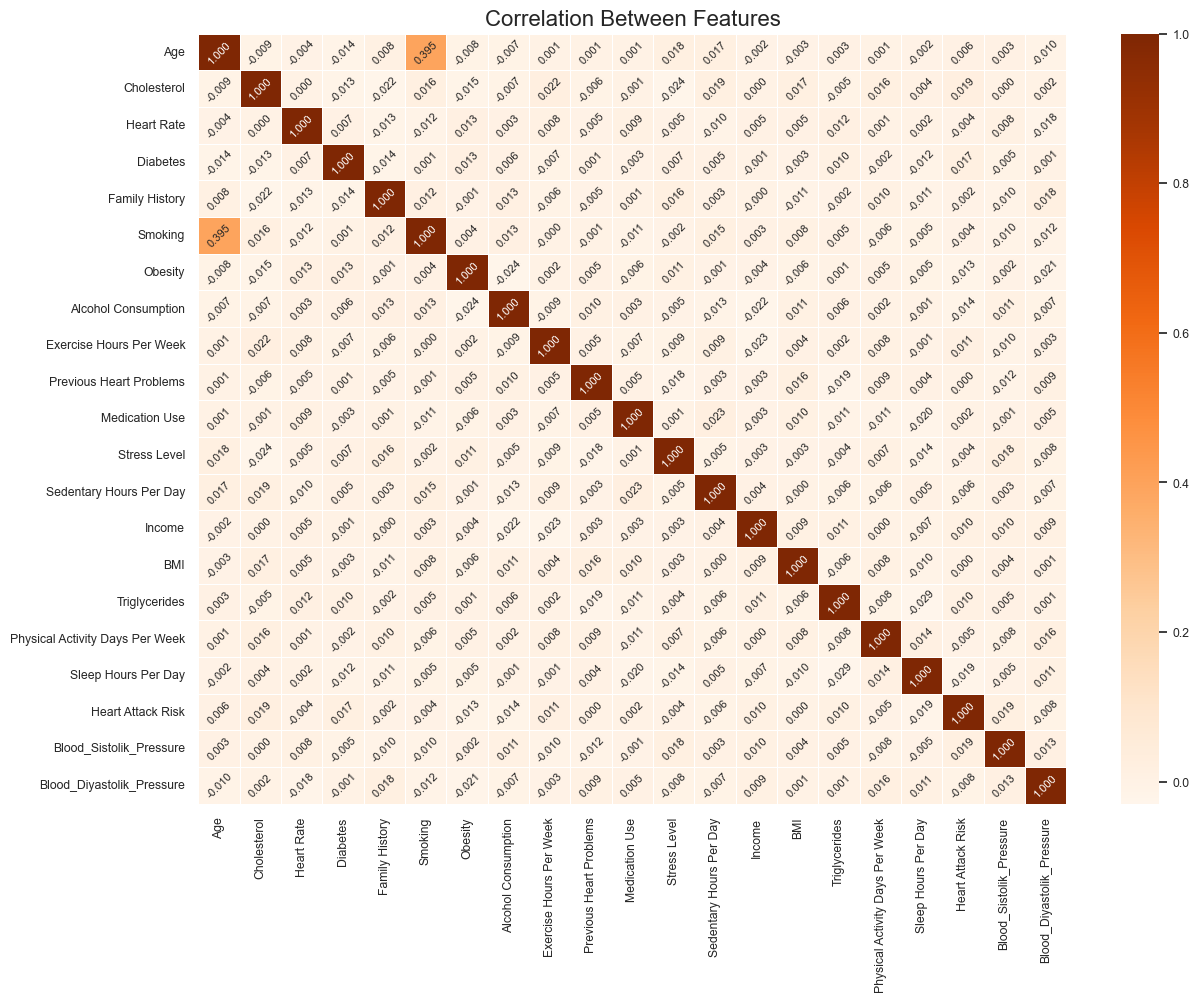

In [10]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.4, fmt='.3f', cmap="Oranges", annot_kws={'size': 8, 'rotation': 45})
plt.title("Correlation Between Features", fontsize=16)
plt.show()

/var/folders/t7/jzpwthyj49b5gry3gmcxqwxw0000gn/T/ipykernel_21884/3762316473.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


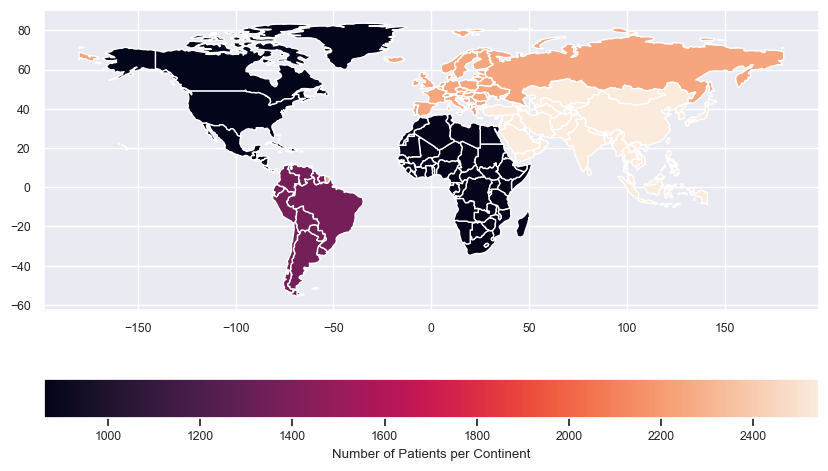

In [12]:
# Using Geopandas to showcase Spartial Analysis
import geopandas as gpd

continent_count = df['Continent'].value_counts()
# Load a world map using geopandas (this is a simple built-in world map)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the continent counts with the world map data
world = world.merge(
    pd.DataFrame(list(continent_count.items()), columns=['continent', 'count']),
    how='left', left_on='continent', right_on='continent'
)

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.plot(column='count', ax=ax, legend=True,
           legend_kwds={'label': "Number of Patients per Continent", 'orientation': "horizontal"})
plt.show()

/var/folders/t7/jzpwthyj49b5gry3gmcxqwxw0000gn/T/ipykernel_21884/4167373126.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


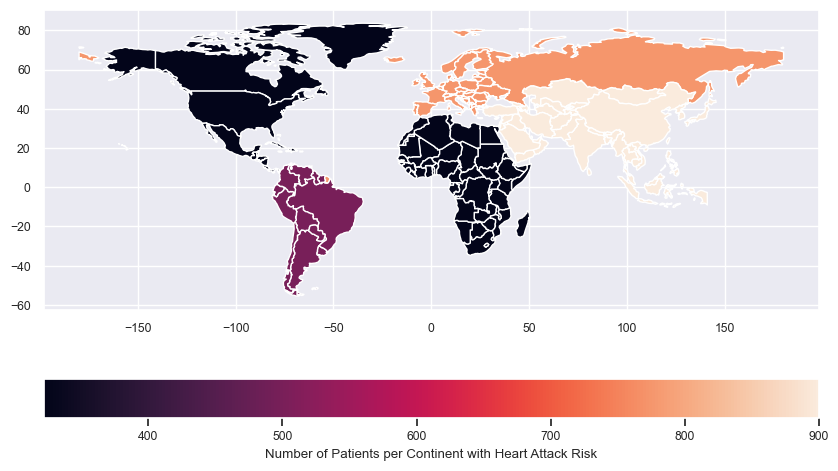

In [17]:
Risk_by_continent = df[df['Heart Attack Risk'] == 1].groupby('Continent')['Heart Attack Risk'].count()
# Load a world map using geopandas (this is a simple built-in world map)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the continent counts with the world map data
world = world.merge(
    pd.DataFrame(list(Risk_by_continent.items()), columns=['continent', 'count']),
    how='left', left_on='continent', right_on='continent'
)

# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.plot(column='count', ax=ax, legend=True,
           legend_kwds={'label': "Number of Patients per Continent with Heart Attack Risk", 'orientation': "horizontal"})
plt.show()